# RMC for non linear ODEs

A general approach to smooth nonlinear problems is to linearlize around the solution. <br> 
Let's look at following example:
$$y'= y^2$$
Say that we have a approx solution $y \approx z$ 
$$y' = (y-z+z)^2 = (y-z)^2 - 2(y-z)z + z^2$$
If the approx solution is sufficiently good $(y-z)^2$ is small and we can linearlize:
$$y' \approx - 2(y-z)z + z^2$$
If the non linear ODE was stable under linearlization you can get better and better solutions by solving previous linear ODE.<br>
RMC with dynamic control variate fits naturally in this linearlization, z being just the dynamic control variate. The dynamic control variate now does has influence on the convergence so needs to be updated accordantly.

An other way to deal with nonlinearty:
same problem $y(1)=-1$ solution $-\frac{1}{x}$

%error= -0.05499999999999944
result= -0.6300000000000003


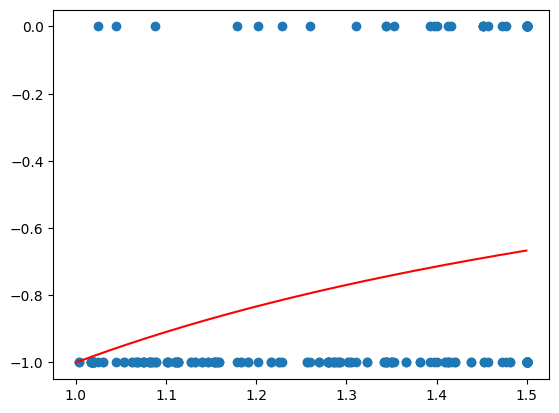

In [33]:
from random import random,sample
import matplotlib.pyplot as plt
memo = []
def y(t):
    if t>2.5:
        raise Exception("variance to big for that t")
    k = (t-1) if t<2 else 1 # careful kill more then you create on average
    if random()>k:
        memo.append((t,-1))
        return -1
    else:
        s = random()*(t-1) + 1
        sol = -1 + (t-1) * y(s) * y(s) /k  # not y^2
        memo.append((t,sol))
        return  sol

end = 1.5
nsim= 10**2
res = 0
for _ in range(nsim):
    res += y(end)/nsim
print("%error=",(res+1/end)*(-end))
print("result=",res)

x,z = zip(*memo)
xx = [ 1+ xi*(end-1)/1000 for xi in range(1000)] 
yy = [-1/xi for xi in xx]
plt.plot(xx,yy, color="red")
plt.scatter(x,z)
plt.show()